In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
sales_data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
sales_data.isnull()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [8]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
sales_data.dropna(inplace=True)

In [13]:
sales_data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [14]:
# Select relevant numerical features for clustering
data_for_clustering = sales_data[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

In [15]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [16]:
# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)  # Testing cluster counts from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

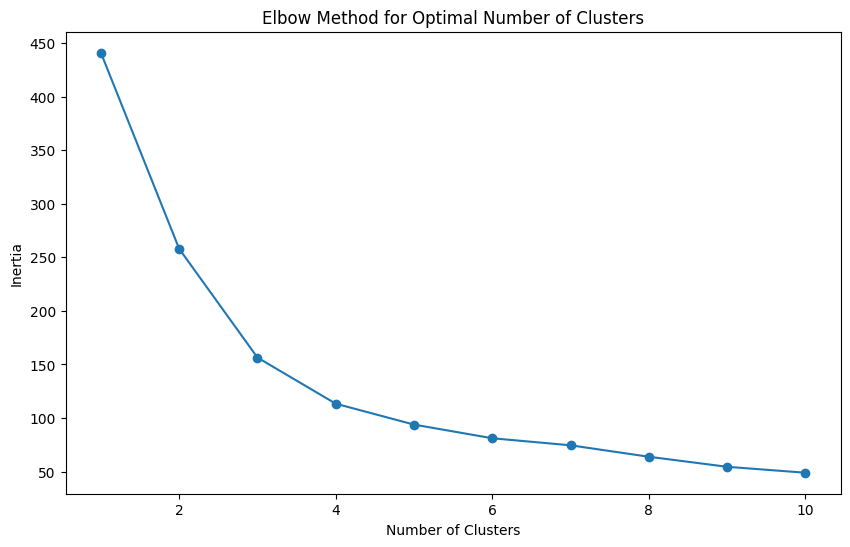

In [17]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [18]:
# Implement K-Means clustering with the chosen number of clusters (e.g., 3 clusters)
optimal_clusters = 3  # Replace this with the number of clusters determined by the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [19]:
# Append cluster labels to the original data
sales_data['Cluster'] = kmeans_labels

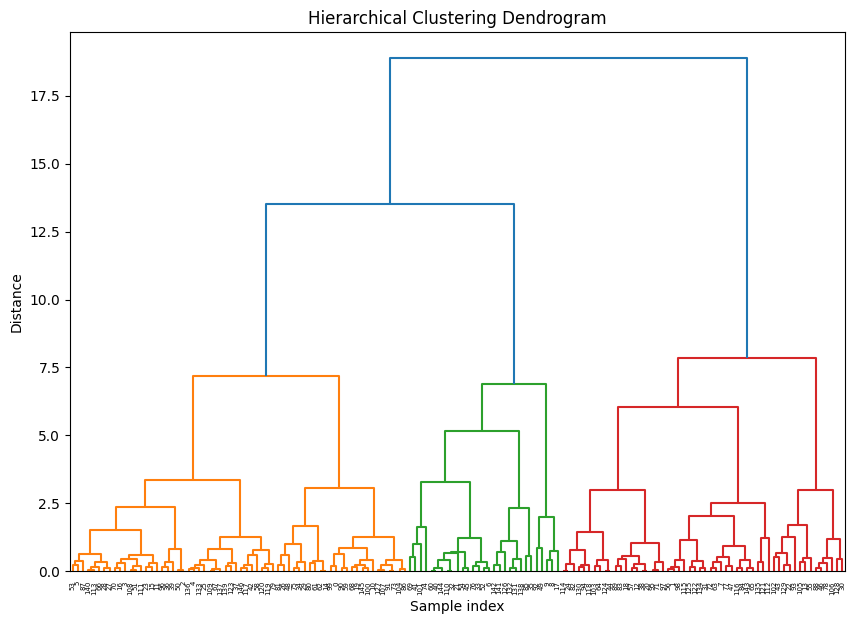

In [20]:
# Hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
